In [18]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

# Scale the data
from sklearn.preprocessing import MinMaxScaler

#NN Layers 
from keras.models import Sequential
from keras.layers import Dense, LSTM


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-18 to 2023-01-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


c:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tesla')

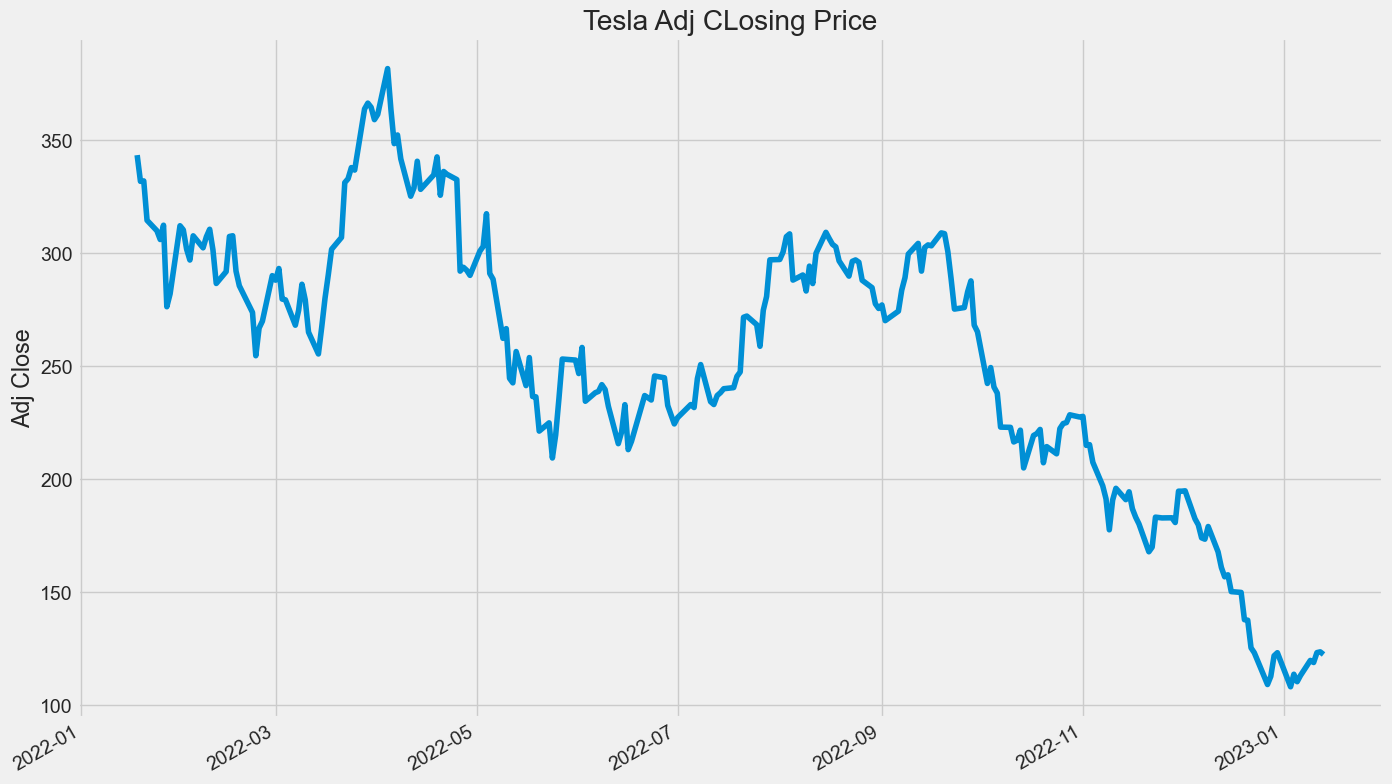

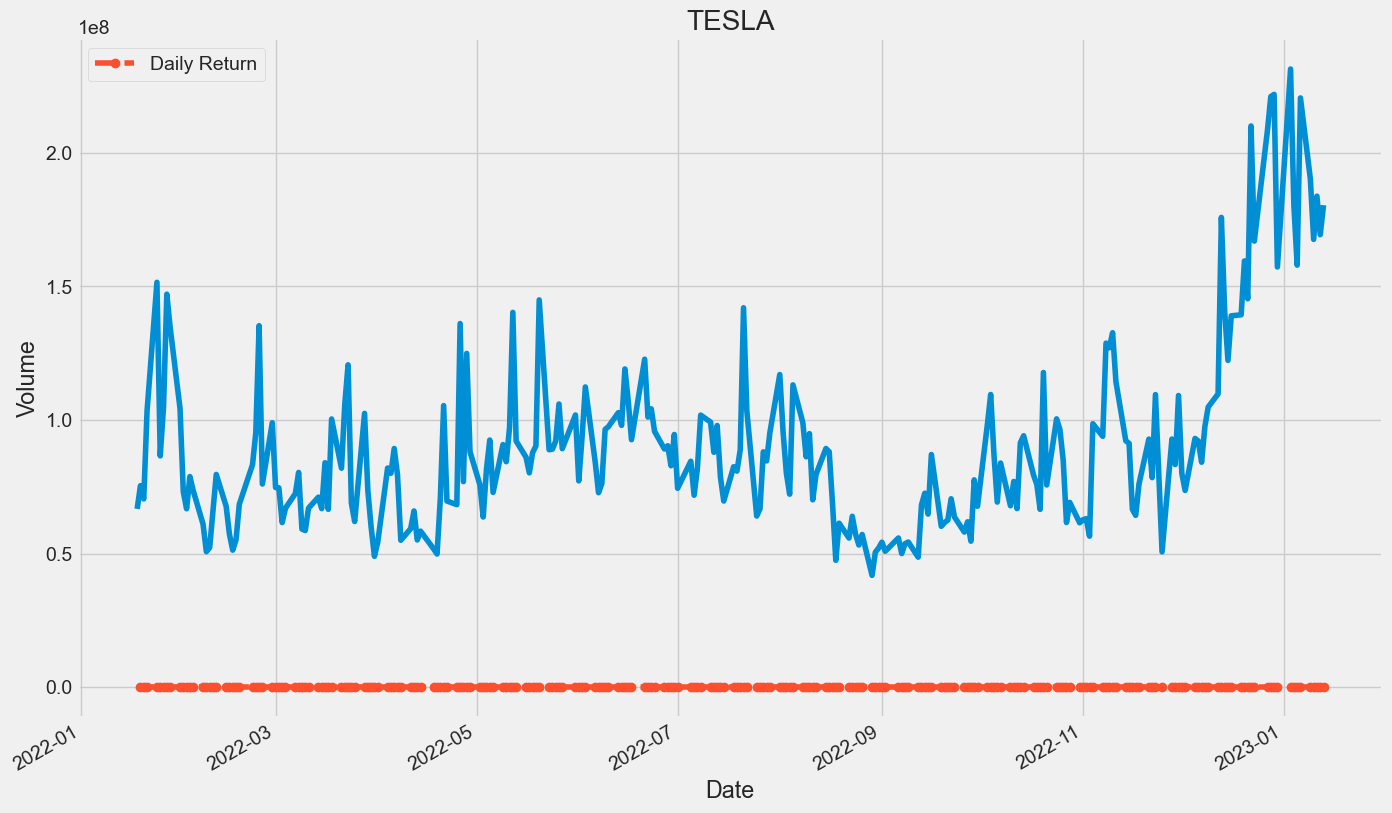

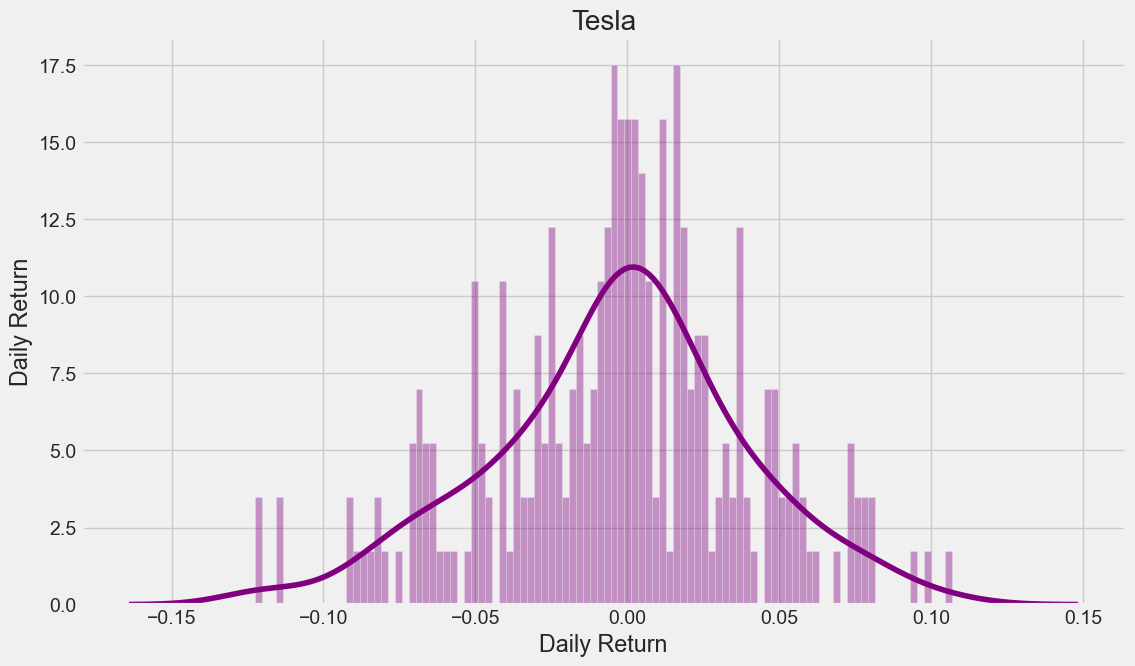

In [13]:
# Set up End and Start times for data grab
end = '2023-01-17'
datetime.now()
start = '2022-01-17'

TSLA=pdr.get_data_yahoo('TSLA',start,end)
TSLA.head(10)
TSLA.describe()
TSLA.info()

# Let's see a historical view of the closing price



plt.figure(figsize=(15, 10))

TSLA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Tesla Adj CLosing Price")
    
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))

TSLA['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Tesla Sales Volume")

# We'll use pct_change to find the percent change for each day
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

# Then we'll plot the daily return percentage

TSLA['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('TESLA')

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))


sns.distplot(TSLA['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('Tesla')

In [14]:
TSLA = pdr.get_data_yahoo('TSLA', datetime(2012,1,1), datetime(2021,6,1))
TSLA


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2021-05-24,193.866669,204.826660,191.216660,202.146667,202.146667,103674300
2021-05-25,202.436661,204.663330,198.570007,201.563339,201.563339,84017700
2021-05-26,202.520004,208.723328,200.500000,206.376663,206.376663,85917900


In [15]:
# Create a new dataframe with only the 'Close column 
data = TSLA.filter(['Close'])
# Convert the dataframe to a numpy array
data.info
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len



scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

[array([0.00120428, 0.00112005, 0.00098574, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.00086736, 0.00090606, 0.00105403,
       0.00117924, 0.00140006, 0.00148885, 0.00154348, 0.00142966,
       0.00154576, 0.00169829, 0.00190318, 0.00205115, 0.00200562,
       0.00208075, 0.00222872, 0.00189179, 0.00198058, 0.00236303,
       0.00246092, 0.00259296, 0.00277281, 0.00266581, 0.00260207,
       0.00267264, 0.00249507, 0.00246548, 0.00250873, 0.00241767,
       0.00264532, 0.00256109, 0.00249962, 0.00234937, 0.00235165,
       0.00234027, 0.00272045, 0.00300957, 0.00302778, 0.00284566,
       0.00277964, 0.00285249, 0.00277508, 0.00277053, 0.00281378,
       0.00264305, 0.0025702 , 0.003326  , 0.00344894, 0.00342845])]
[0.0033100694417211455]

[array([0.00120428, 0.00112005, 0.00098574, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.

37.459445459936376

C:\Users\mohit\AppData\Local\Temp\ipykernel_8204\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


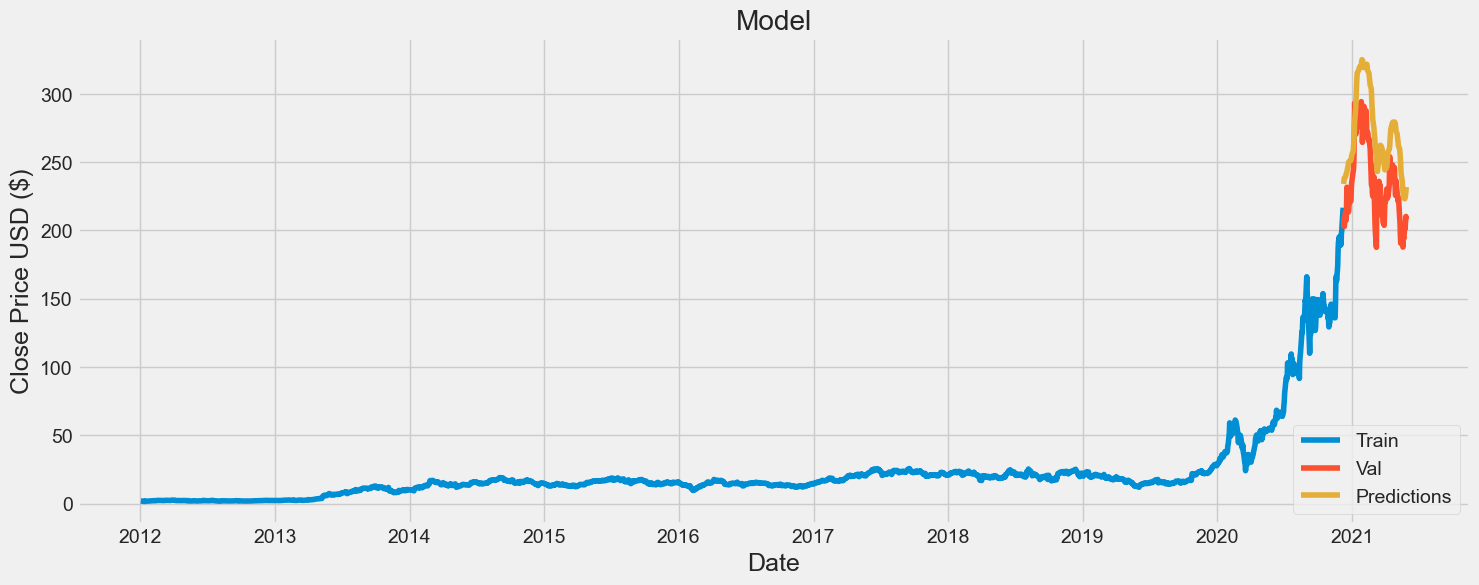

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
# Show the valid and predicted prices
valid.head(20)

,Close,Predictions
Date,,
2020-12-09,201.493332,234.047638
2020-12-10,209.023331,236.507904
2020-12-11,203.330002,238.467133
2020-12-14,213.276672,239.107513
2020-12-15,211.083328,240.310196
2020-12-16,207.589996,241.366425
2020-12-17,218.633331,241.750031
2020-12-18,231.666672,243.231003
2020-12-21,216.619995,246.901245
